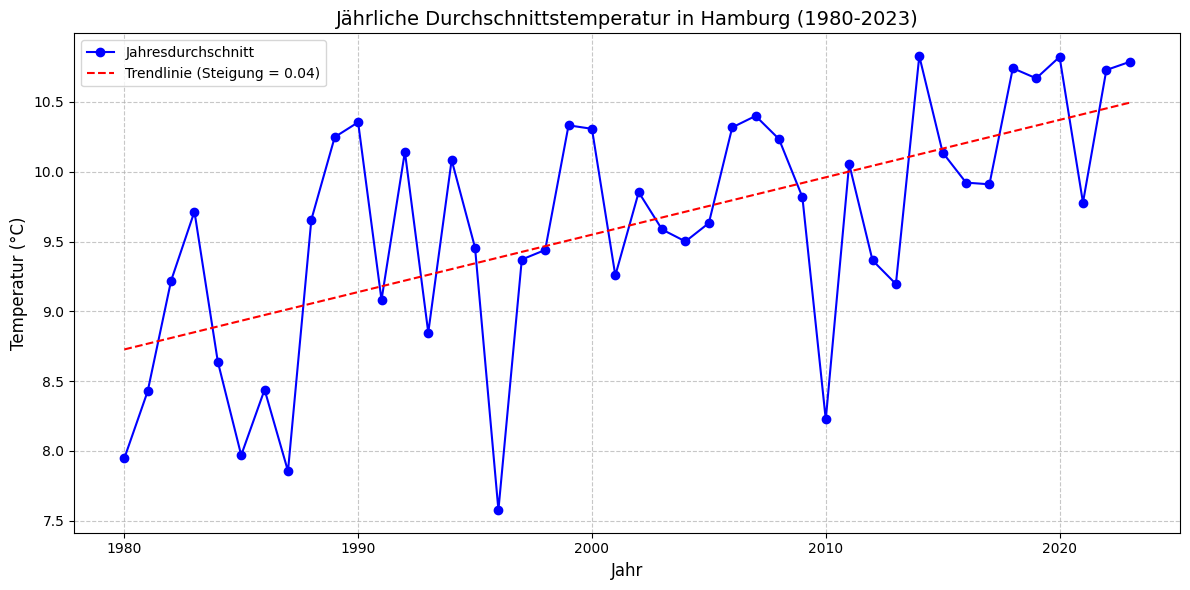

In [14]:
from meteostat import Point, Daily
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Set the location for Hamburg
hamburg = Point(53.550341, 10.000654)

# Define the time period (1980 - 2023) as datetime objects
start = datetime(1980, 1, 1)
end = datetime(2023, 12, 31)

# Retrieve daily weather data for Hamburg
data = Daily(hamburg, start, end)
data = data.fetch()

# Check if data is available
if not data.empty:
    # Add a year column to group by year
    data['year'] = data.index.year

    # Calculate the annual average temperature
    annual_avg_temp = data.groupby('year')['tavg'].mean()

    # Perform linear regression on the annual average temperatures
    years = annual_avg_temp.index
    temps = annual_avg_temp.values
    slope, intercept, r_value, p_value, std_err = stats.linregress(years, temps)

    # Calculate the trendline values
    trendline = slope * years + intercept

    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(annual_avg_temp.index, annual_avg_temp, marker='o', linestyle='-', color='b', label='Jahresdurchschnitt')
    plt.plot(years, trendline, linestyle='--', color='r', label=f'Trendlinie (Steigung = {slope:.2f})')
    plt.title('Jährliche Durchschnittstemperatur in Hamburg (1980-2023)', fontsize=14)
    plt.xlabel('Jahr', fontsize=12)
    plt.ylabel('Temperatur (°C)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()

    # Show the plot
    plt.show()

else:
    print("Keine Wetterdaten für den angegebenen Zeitraum verfügbar.")

In [5]:
from meteostat import Point, Daily
from datetime import datetime
import numpy as np

# Set the location for Hamburg
hamburg = Point(53.550341, 10.000654)

# Define the time period (1980 - 2023) as datetime objects
start = datetime(1980, 1, 1)
end = datetime(2023, 12, 31)

# Retrieve daily weather data for Hamburg
data = Daily(hamburg, start, end)
data = data.fetch()

# Check if data is available
if not data.empty:
    # Add a year column to group by year
    data['year'] = data.index.year

    # Calculate the annual average temperature
    annual_avg_temp = data.groupby('year')['tavg'].mean()

    # Calculate the trend (linear regression)
    x = np.array(annual_avg_temp.index)  # Jahre
    y = annual_avg_temp.values  # Durchschnittstemperatur
    trend = np.polyfit(x, y, 1)  # Linear fit: [m, b] -> y = mx + b
    slope = trend[0]  # Die Steigung der Trendlinie

    # Interpretation der Steigung
    print(f"Die berechnete Steigung der Trendlinie beträgt {slope:.4f} °C pro Jahr.")

    if slope > 0:
        print(f"Das bedeutet, dass die durchschnittliche Temperatur in Hamburg von 1980 bis 2023 "
              f"pro Jahr um etwa {slope:.4f} °C gestiegen ist. Dies deutet auf eine Erwärmung hin.")
    elif slope < 0:
        print(f"Das bedeutet, dass die durchschnittliche Temperatur in Hamburg von 1980 bis 2023 "
              f"pro Jahr um etwa {abs(slope):.4f} °C gefallen ist. Dies deutet auf eine Abkühlung hin.")
    else:
        print("Die Steigung beträgt 0, was bedeutet, dass keine signifikante Änderung der Durchschnittstemperatur festgestellt wurde.")
else:
    print("Keine Wetterdaten für den angegebenen Zeitraum verfügbar.")

Die berechnete Steigung der Trendlinie beträgt 0.0411 °C pro Jahr.
Das bedeutet, dass die durchschnittliche Temperatur in Hamburg von 1980 bis 2023 pro Jahr um etwa 0.0411 °C gestiegen ist. Dies deutet auf eine Erwärmung hin.


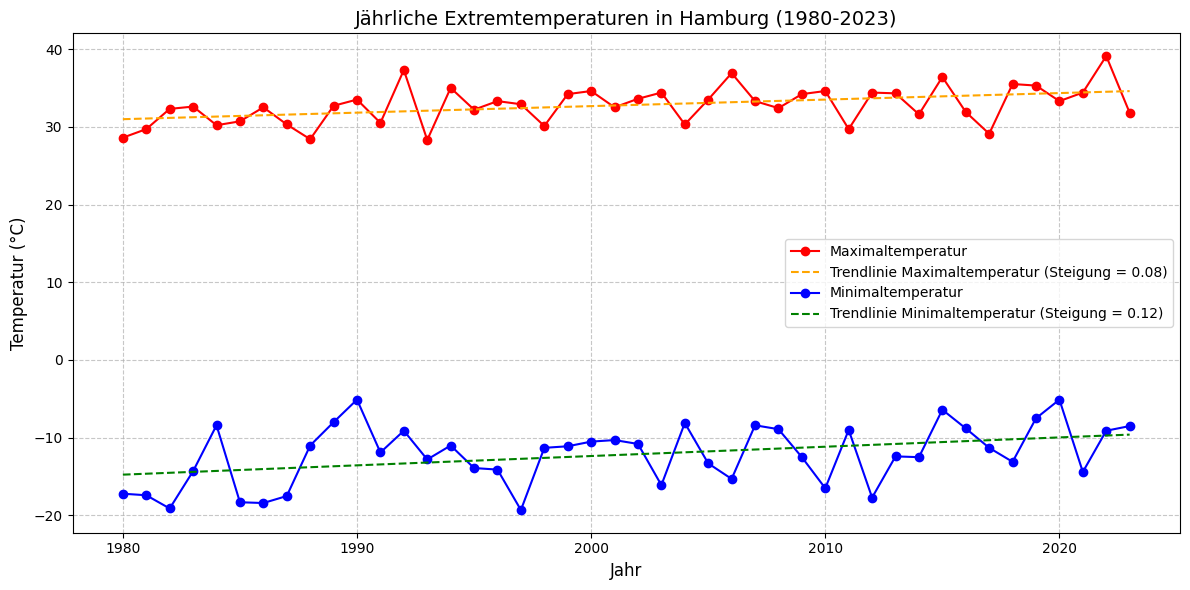

In [15]:
from meteostat import Point, Daily
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Set the location for Hamburg
hamburg = Point(53.550341, 10.000654)

# Define the time period (1980 - 2023) as datetime objects
start = datetime(1980, 1, 1)
end = datetime(2023, 12, 31)

# Retrieve daily weather data for Hamburg
data = Daily(hamburg, start, end)
data = data.fetch()

# Check if data is available
if not data.empty:
    # Add a year column to group by year
    data['year'] = data.index.year

    # Calculate the annual maximum and minimum temperatures
    annual_max_temp = data.groupby('year')['tmax'].max()
    annual_min_temp = data.groupby('year')['tmin'].min()

    # Perform linear regression on the annual maximum temperatures
    max_years = annual_max_temp.index
    max_temps = annual_max_temp.values
    slope_max, intercept_max, r_value_max, p_value_max, std_err_max = stats.linregress(max_years, max_temps)

    # Perform linear regression on the annual minimum temperatures
    min_years = annual_min_temp.index
    min_temps = annual_min_temp.values
    slope_min, intercept_min, r_value_min, p_value_min, std_err_min = stats.linregress(min_years, min_temps)

    # Calculate the trendline values for max and min temperatures
    trendline_max = slope_max * max_years + intercept_max
    trendline_min = slope_min * min_years + intercept_min

    # Plot the data
    plt.figure(figsize=(12, 6))

    # Plot the maximum temperatures and trendline
    plt.plot(annual_max_temp.index, annual_max_temp, marker='o', linestyle='-', color='r', label='Maximaltemperatur')
    plt.plot(max_years, trendline_max, linestyle='--', color='orange', label=f'Trendlinie Maximaltemperatur (Steigung = {slope_max:.2f})')

    # Plot the minimum temperatures and trendline
    plt.plot(annual_min_temp.index, annual_min_temp, marker='o', linestyle='-', color='b', label='Minimaltemperatur')
    plt.plot(min_years, trendline_min, linestyle='--', color='green', label=f'Trendlinie Minimaltemperatur (Steigung = {slope_min:.2f})')

    # Set titles and labels
    plt.title('Jährliche Extremtemperaturen in Hamburg (1980-2023)', fontsize=14)
    plt.xlabel('Jahr', fontsize=12)
    plt.ylabel('Temperatur (°C)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()

    # Show the plot
    plt.show()

else:
    print("Keine Wetterdaten für den angegebenen Zeitraum verfügbar.")

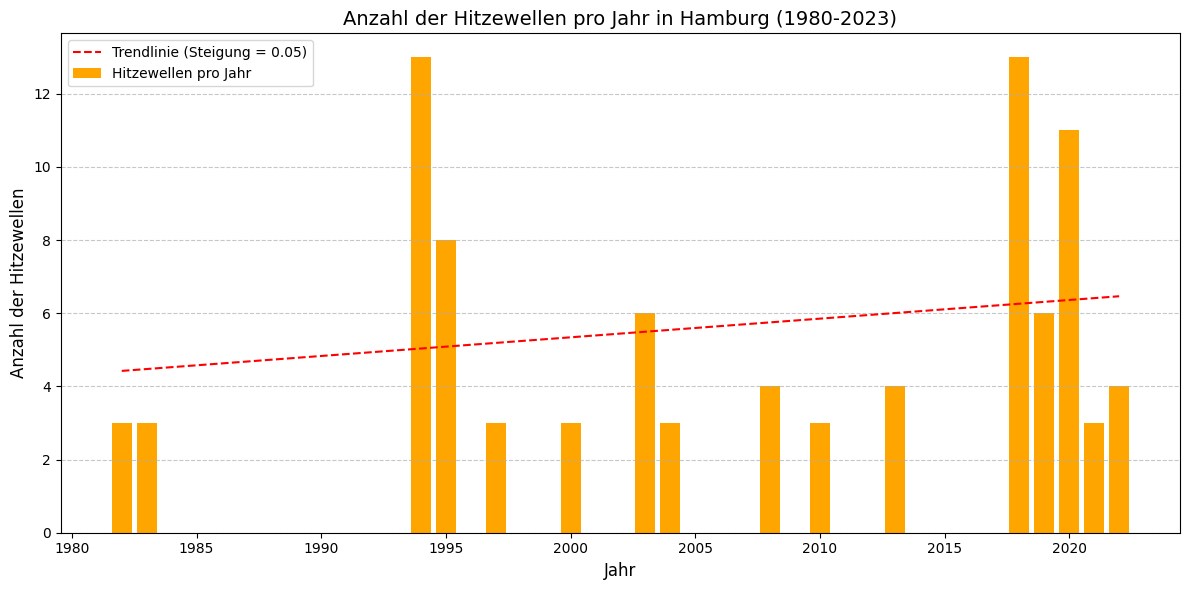

Die berechnete Steigung der Trendlinie beträgt 0.0510 Hitzewellen pro Jahr.
Die Anzahl der Hitzewellen pro Jahr nimmt zu, was auf eine Erwärmung hindeutet.


In [17]:
from meteostat import Point, Daily
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

# Set the location for Hamburg
hamburg = Point(53.550341, 10.000654)

# Define the time period (1980 - 2023) as datetime objects
start = datetime(1980, 1, 1)
end = datetime(2023, 12, 31)

# Retrieve daily weather data for Hamburg
data = Daily(hamburg, start, end)
data = data.fetch()

# Check if data is available
if not data.empty:
    # Define the threshold for a heatwave (e.g., tmax > 30 °C for at least 3 consecutive days)
    heatwave_threshold = 30.0

    # Identify heatwave days (tmax > threshold)
    data['heatwave'] = data['tmax'] > heatwave_threshold

    # Group by consecutive days with heatwave condition
    data['heatwave_group'] = (data['heatwave'] != data['heatwave'].shift()).cumsum()

    # Count consecutive heatwave days
    heatwave_counts = data.groupby('heatwave_group').agg({'heatwave': 'sum'})

    # Filter groups with at least 3 consecutive days
    heatwave_periods = heatwave_counts[heatwave_counts['heatwave'] >= 3]

    # Add year column
    data['year'] = data.index.year

    # Identify the years where heatwaves occurred
    heatwave_years = data.loc[data['heatwave_group'].isin(heatwave_periods.index), 'year']

    # Count the number of heatwaves per year
    heatwave_per_year = heatwave_years.value_counts().sort_index()

    # Prepare data for linear regression
    x = np.array(heatwave_per_year.index)  # Years
    y = np.array(heatwave_per_year.values)  # Number of heatwaves
    trend = np.polyfit(x, y, 1)  # Linear regression: [slope, intercept]
    trend_line = np.polyval(trend, x)

    # Calculate the slope of the trendline
    slope = trend[0]

    # Plot the data and the trendline
    plt.figure(figsize=(12, 6))
    plt.bar(heatwave_per_year.index, heatwave_per_year.values, color='orange', label='Hitzewellen pro Jahr')
    plt.plot(heatwave_per_year.index, trend_line, color='red', linestyle='--', label=f'Trendlinie (Steigung = {slope:.2f})')
    plt.title('Anzahl der Hitzewellen pro Jahr in Hamburg (1980-2023)', fontsize=14)
    plt.xlabel('Jahr', fontsize=12)
    plt.ylabel('Anzahl der Hitzewellen', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Output the trendline information
    print(f"Die berechnete Steigung der Trendlinie beträgt {slope:.4f} Hitzewellen pro Jahr.")
    if slope > 0:
        print("Die Anzahl der Hitzewellen pro Jahr nimmt zu, was auf eine Erwärmung hindeutet.")
    elif slope < 0:
        print("Die Anzahl der Hitzewellen pro Jahr nimmt ab, was ungewöhnlich wäre.")
    else:
        print("Keine signifikante Änderung der Anzahl der Hitzewellen pro Jahr festgestellt.")
else:
    print("Keine Wetterdaten für den angegebenen Zeitraum verfügbar.")

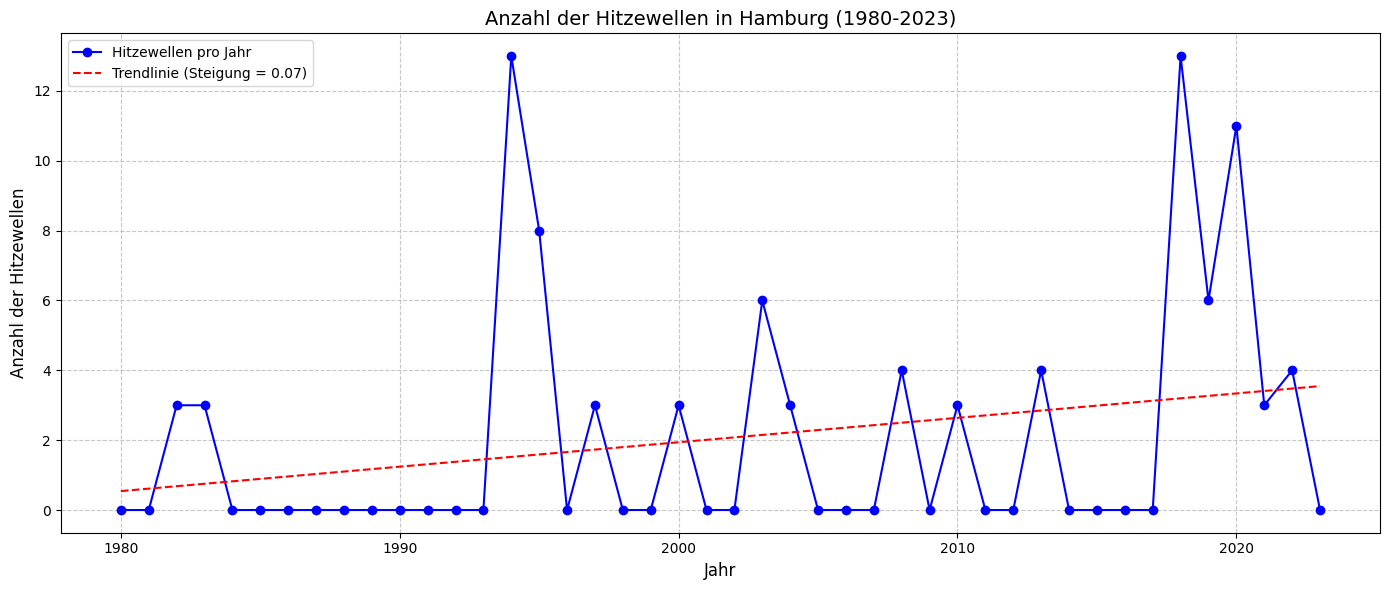

Nicht genügend gültige Daten für die Berechnung der Trendlinie der maximalen Temperaturen.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from meteostat import Point, Daily
from scipy import stats

# Standort Hamburg festlegen
hamburg = Point(53.550341, 10.000654)

# Zeitraum definieren (1980 - 2023)
start = datetime(1980, 1, 1)
end = datetime(2023, 12, 31)

# Wetterdaten für Hamburg abrufen
data = Daily(hamburg, start, end)
data = data.fetch()

# Prüfen, ob Daten verfügbar sind
if not data.empty:
    # Schwellenwert für Hitzewellen definieren (z. B. tmax > 30°C)
    schwellenwert_hitzewelle = 30.0

    # Hitzewellentage identifizieren (tmax > Schwellenwert)
    data['hitzewelle'] = data['tmax'] > schwellenwert_hitzewelle

    # Gruppen für aufeinanderfolgende Hitzewellentage bilden
    data['hitzewellen_gruppe'] = (data['hitzewelle'] != data['hitzewelle'].shift()).cumsum()

    # Aufeinanderfolgende Hitzewellentage zählen
    hitzewellen_zaehler = data.groupby('hitzewellen_gruppe').agg({'hitzewelle': 'sum'})

    # Gruppen mit mindestens 3 aufeinanderfolgenden Tagen filtern (Hitzewellen definieren)
    hitzewellen_perioden = hitzewellen_zaehler[hitzewellen_zaehler['hitzewelle'] >= 3]

    # Jahresinformation hinzufügen
    data['jahr'] = data.index.year

    # Anzahl der Hitzewellen pro Jahr zählen
    hitzewellen_pro_jahr = data.loc[data['hitzewellen_gruppe'].isin(hitzewellen_perioden.index), 'jahr'].value_counts().sort_index()

    # Fehlende Jahre mit 0 auffüllen
    hitzewellen_pro_jahr = hitzewellen_pro_jahr.reindex(range(1980, 2024), fill_value=0)

    # Maximale Temperatur während der Hitzewellen berechnen
    max_temp_per_group = data.groupby('hitzewellen_gruppe')['tmax'].max()
    max_temp_per_group = max_temp_per_group[hitzewellen_perioden.index]
    hitzewellen_max_temp_pro_jahr = max_temp_per_group.groupby(data.loc[data['hitzewellen_gruppe'].isin(hitzewellen_perioden.index), 'jahr']).max()

    # Fehlende Jahre mit NaN auffüllen
    hitzewellen_max_temp_pro_jahr = hitzewellen_max_temp_pro_jahr.reindex(range(1980, 2024), fill_value=np.nan)

    # Lineare Trendanalyse der Häufigkeit von Hitzewellen
    trend_hitzewellen = stats.linregress(hitzewellen_pro_jahr.index, hitzewellen_pro_jahr.values)

    # Plot: Hitzewellen-Häufigkeit mit Trendlinie
    plt.figure(figsize=(14, 6))
    plt.plot(hitzewellen_pro_jahr.index, hitzewellen_pro_jahr.values, label='Hitzewellen pro Jahr', marker='o', color='blue')
    plt.plot(hitzewellen_pro_jahr.index, 
             trend_hitzewellen.intercept + trend_hitzewellen.slope * hitzewellen_pro_jahr.index,
             label=f'Trendlinie (Steigung = {trend_hitzewellen.slope:.2f})', linestyle='--', color='red')
    plt.title('Anzahl der Hitzewellen in Hamburg (1980-2023)', fontsize=14)
    plt.xlabel('Jahr', fontsize=12)
    plt.ylabel('Anzahl der Hitzewellen', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Lineare Trendanalyse der maximalen Temperaturen
    valid_years = ~np.isnan(hitzewellen_max_temp_pro_jahr.values)

    if valid_years.sum() > 1:  # Mindestens 2 Punkte für eine Regression notwendig
        trend_intensitaet = stats.linregress(
            hitzewellen_max_temp_pro_jahr.index[valid_years],
            hitzewellen_max_temp_pro_jahr.values[valid_years]
        )

        # Plot: Maximale Temperaturen während der Hitzewellen mit Trendlinie
        plt.figure(figsize=(14, 6))
        plt.plot(hitzewellen_max_temp_pro_jahr.index, hitzewellen_max_temp_pro_jahr.values, label='Maximale Hitzewellen-Temperatur pro Jahr', marker='o', color='orange')
        plt.plot(hitzewellen_max_temp_pro_jahr.index, 
                 trend_intensitaet.intercept + trend_intensitaet.slope * hitzewellen_max_temp_pro_jahr.index,
                 label=f'Trendlinie (Steigung = {trend_intensitaet.slope:.2f})', linestyle='--', color='red')
        plt.title('Maximale Temperaturen während Hitzewellen in Hamburg (1980-2023)', fontsize=14)
        plt.xlabel('Jahr', fontsize=12)
        plt.ylabel('Maximale Temperatur (\u00b0C)', fontsize=12)
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print("Nicht genügend gültige Daten für die Berechnung der Trendlinie der maximalen Temperaturen.")
else:
    print("Keine Wetterdaten für den angegebenen Zeitraum verfügbar.")

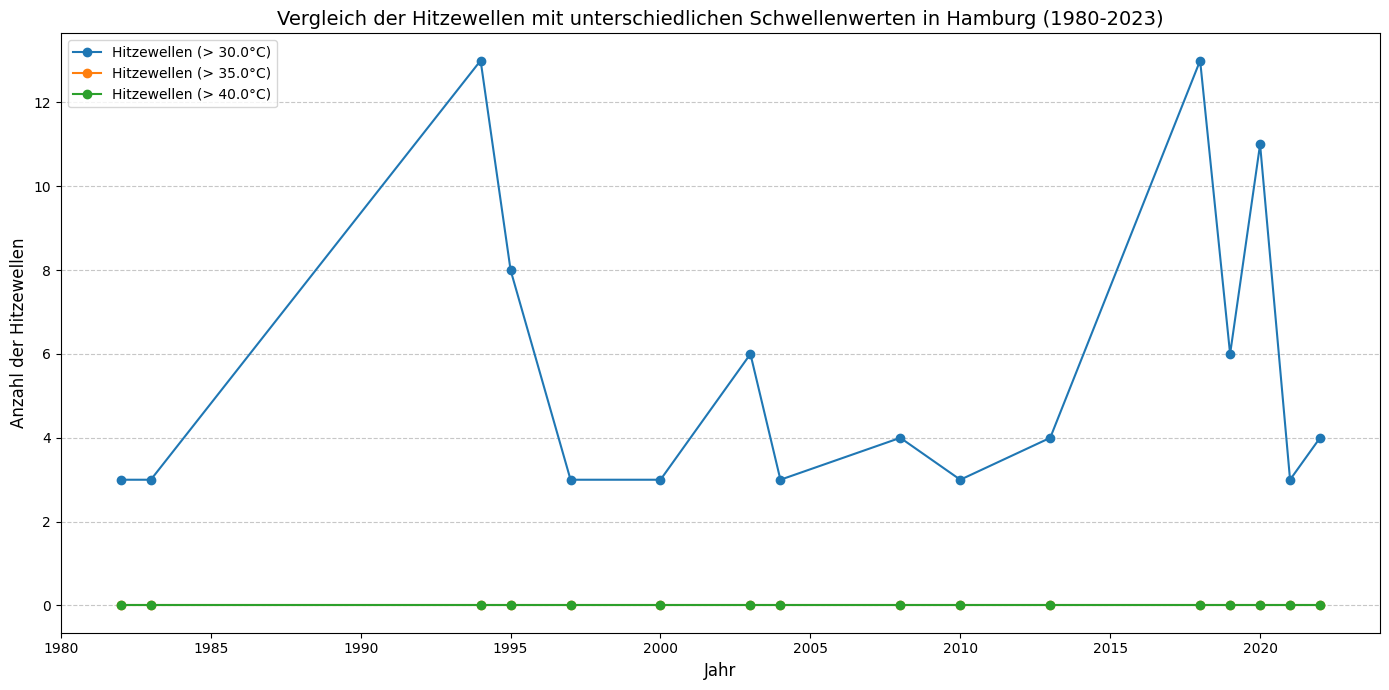

In [7]:
from meteostat import Point, Daily
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set the location for Hamburg
hamburg = Point(53.550341, 10.000654)

# Define the time period (1980 - 2023) as datetime objects
start = datetime(1980, 1, 1)
end = datetime(2023, 12, 31)

# Retrieve daily weather data for Hamburg
data = Daily(hamburg, start, end)
data = data.fetch()

# Check if data is available
if not data.empty:
    # Define temperature thresholds for heatwaves
    thresholds = [30.0, 35.0, 40.0]
    heatwave_data = {}

    for threshold in thresholds:
        # Identify heatwave days (tmax > threshold)
        data['heatwave'] = data['tmax'] > threshold

        # Group by consecutive days with heatwave condition
        data['heatwave_group'] = (data['heatwave'] != data['heatwave'].shift()).cumsum()

        # Count consecutive heatwave days
        heatwave_counts = data.groupby('heatwave_group').agg({'heatwave': 'sum'})

        # Filter groups with at least 3 consecutive days
        heatwave_periods = heatwave_counts[heatwave_counts['heatwave'] >= 3]

        # Add year column
        data['year'] = data.index.year

        # Identify the years where heatwaves occurred
        heatwave_years = data.loc[data['heatwave_group'].isin(heatwave_periods.index), 'year']

        # Count the number of heatwaves per year
        heatwave_per_year = heatwave_years.value_counts().sort_index()

        # Store the results for the current threshold
        heatwave_data[threshold] = heatwave_per_year

    # Create a DataFrame for comparison
    df_heatwave = pd.DataFrame(heatwave_data).fillna(0)

    # Plot the comparison of thresholds
    plt.figure(figsize=(14, 7))
    for threshold in thresholds:
        plt.plot(
            df_heatwave.index, 
            df_heatwave[threshold], 
            label=f'Hitzewellen (> {threshold}°C)', 
            marker='o'
        )

    plt.title('Vergleich der Hitzewellen mit unterschiedlichen Schwellenwerten in Hamburg (1980-2023)', fontsize=14)
    plt.xlabel('Jahr', fontsize=12)
    plt.ylabel('Anzahl der Hitzewellen', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()

    # Show the plot
    plt.show()

else:
    print("Keine Wetterdaten für den angegebenen Zeitraum verfügbar.")

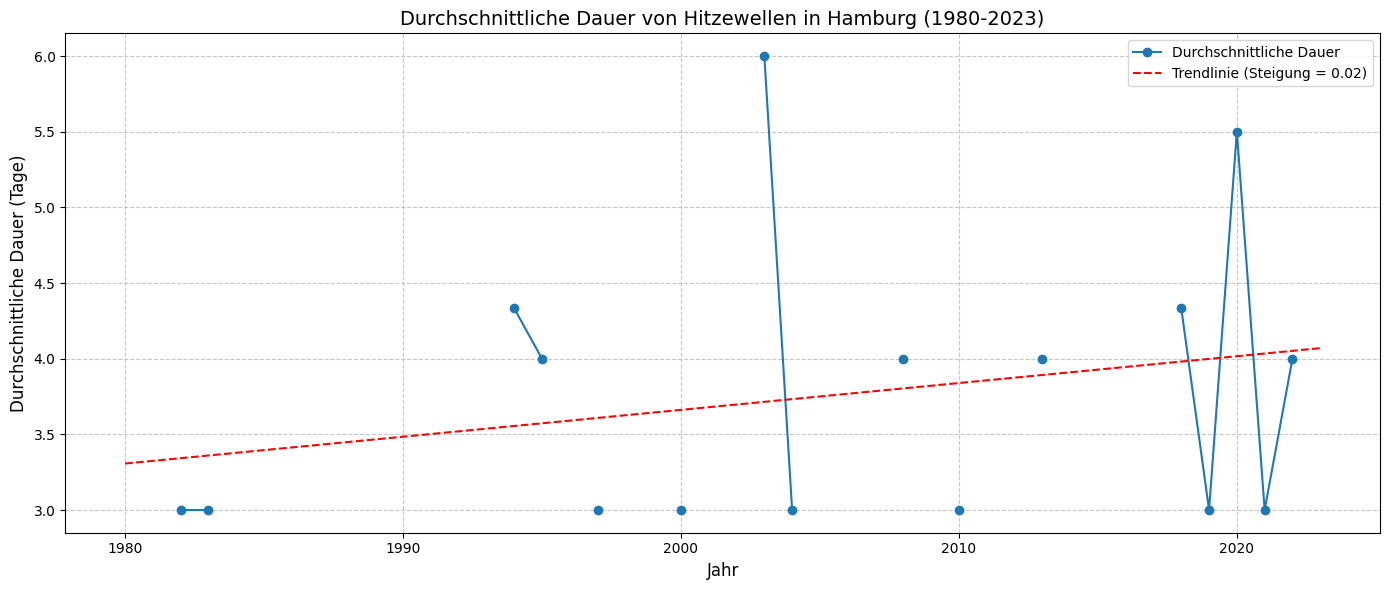

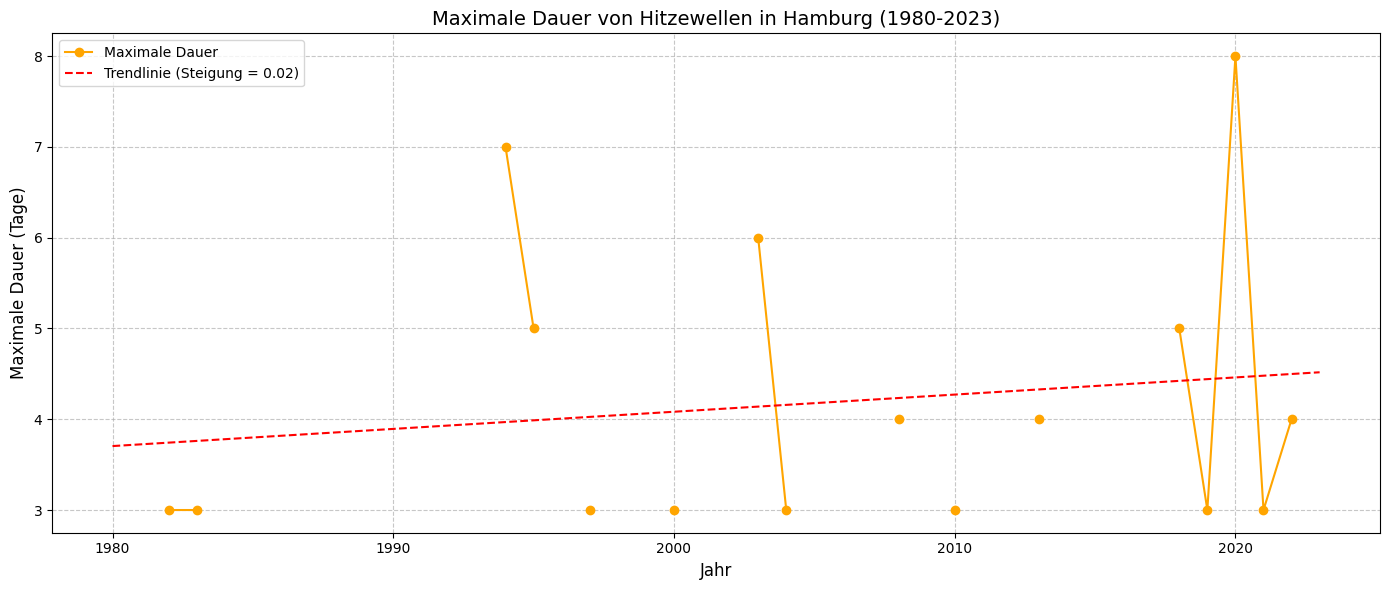

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from meteostat import Point, Daily
from scipy import stats

# Standort Hamburg festlegen
hamburg = Point(53.550341, 10.000654)

# Zeitraum definieren (1980 - 2023)
start = datetime(1980, 1, 1)
end = datetime(2023, 12, 31)

# Wetterdaten für Hamburg abrufen
data = Daily(hamburg, start, end)
data = data.fetch()

# Prüfen, ob Daten verfügbar sind
if not data.empty:
    # Schwellenwert für Hitzewellen definieren (z. B. tmax > 30°C)
    schwellenwert_hitzewelle = 30.0

    # Hitzewellentage identifizieren (tmax > Schwellenwert)
    data['hitzewelle'] = data['tmax'] > schwellenwert_hitzewelle

    # Gruppen für aufeinanderfolgende Hitzewellentage bilden
    data['hitzewellen_gruppe'] = (data['hitzewelle'] != data['hitzewelle'].shift()).cumsum()

    # Aufeinanderfolgende Hitzewellentage zählen
    hitzewellen_zaehler = data.groupby('hitzewellen_gruppe').agg({'hitzewelle': 'sum'})

    # Gruppen mit mindestens 3 aufeinanderfolgenden Tagen filtern (Hitzewellen definieren)
    hitzewellen_perioden = hitzewellen_zaehler[hitzewellen_zaehler['hitzewelle'] >= 3]

    # Jahresinformation hinzufügen
    data['jahr'] = data.index.year

    # Dauer jeder Hitzewelle mit Jahresangabe berechnen
    hitzewellen_dauer = hitzewellen_perioden['hitzewelle']
    hitzewellen_dauer.index = hitzewellen_dauer.index.map(lambda x: data.loc[data['hitzewellen_gruppe'] == x, 'jahr'].iloc[0])

    # Durchschnittliche und maximale Dauer pro Jahr berechnen
    hitzewellen_dauer_pro_jahr = hitzewellen_dauer.groupby(hitzewellen_dauer.index).agg(['mean', 'max'])

    # Fehlende Jahre mit NaN auffüllen
    hitzewellen_dauer_pro_jahr = hitzewellen_dauer_pro_jahr.reindex(range(1980, 2024), fill_value=np.nan)

    # Lineare Trendanalyse der durchschnittlichen Dauer
    valid_years_mean = ~np.isnan(hitzewellen_dauer_pro_jahr['mean'].values)
    trend_mean = stats.linregress(
        hitzewellen_dauer_pro_jahr.index[valid_years_mean],
        hitzewellen_dauer_pro_jahr['mean'].values[valid_years_mean]
    )

    # Lineare Trendanalyse der maximalen Dauer
    valid_years_max = ~np.isnan(hitzewellen_dauer_pro_jahr['max'].values)
    trend_max = stats.linregress(
        hitzewellen_dauer_pro_jahr.index[valid_years_max],
        hitzewellen_dauer_pro_jahr['max'].values[valid_years_max]
    )

    # Plot: Durchschnittliche Dauer der Hitzewellen pro Jahr mit Trendlinie
    plt.figure(figsize=(14, 6))
    plt.plot(hitzewellen_dauer_pro_jahr.index, hitzewellen_dauer_pro_jahr['mean'], label='Durchschnittliche Dauer', marker='o')
    plt.plot(hitzewellen_dauer_pro_jahr.index, 
             trend_mean.intercept + trend_mean.slope * hitzewellen_dauer_pro_jahr.index,
             label=f'Trendlinie (Steigung = {trend_mean.slope:.2f})', linestyle='--', color='red')
    plt.title('Durchschnittliche Dauer von Hitzewellen in Hamburg (1980-2023)', fontsize=14)
    plt.xlabel('Jahr', fontsize=12)
    plt.ylabel('Durchschnittliche Dauer (Tage)', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Plot: Maximale Dauer der Hitzewellen pro Jahr mit Trendlinie
    plt.figure(figsize=(14, 6))
    plt.plot(hitzewellen_dauer_pro_jahr.index, hitzewellen_dauer_pro_jahr['max'], label='Maximale Dauer', marker='o', color='orange')
    plt.plot(hitzewellen_dauer_pro_jahr.index, 
             trend_max.intercept + trend_max.slope * hitzewellen_dauer_pro_jahr.index,
             label=f'Trendlinie (Steigung = {trend_max.slope:.2f})', linestyle='--', color='red')
    plt.title('Maximale Dauer von Hitzewellen in Hamburg (1980-2023)', fontsize=14)
    plt.xlabel('Jahr', fontsize=12)
    plt.ylabel('Maximale Dauer (Tage)', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

else:
    print("Keine Wetterdaten für den angegebenen Zeitraum verfügbar.")

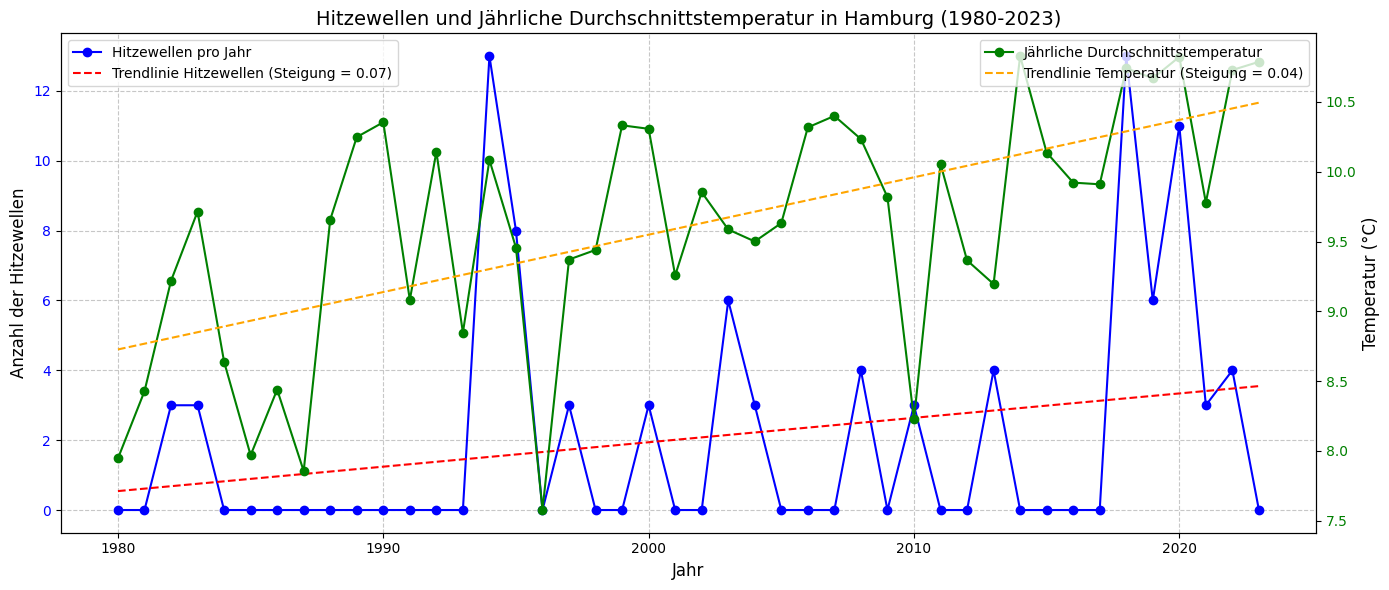

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from meteostat import Point, Daily
from scipy import stats

# Standort Hamburg festlegen
hamburg = Point(53.550341, 10.000654)

# Zeitraum definieren (1980 - 2023)
start = datetime(1980, 1, 1)
end = datetime(2023, 12, 31)

# Wetterdaten für Hamburg abrufen
data = Daily(hamburg, start, end)
data = data.fetch()

# Prüfen, ob Daten verfügbar sind
if not data.empty:
    # Schwellenwert für Hitzewellen definieren (tmax > 30°C)
    schwellenwert_hitzewelle = 30.0

    # Hitzewellentage identifizieren (tmax > Schwellenwert)
    data['hitzewelle'] = data['tmax'] > schwellenwert_hitzewelle

    # Gruppen für aufeinanderfolgende Hitzewellentage bilden
    data['hitzewellen_gruppe'] = (data['hitzewelle'] != data['hitzewelle'].shift()).cumsum()

    # Aufeinanderfolgende Hitzewellentage zählen
    hitzewellen_zaehler = data.groupby('hitzewellen_gruppe').agg({'hitzewelle': 'sum'})

    # Gruppen mit mindestens 3 aufeinanderfolgenden Tagen filtern (Hitzewellen definieren)
    hitzewellen_perioden = hitzewellen_zaehler[hitzewellen_zaehler['hitzewelle'] >= 3]

    # Jahresinformation hinzufügen
    data['jahr'] = data.index.year

    # Anzahl der Hitzewellen pro Jahr zählen
    hitzewellen_pro_jahr = data.loc[data['hitzewellen_gruppe'].isin(hitzewellen_perioden.index), 'jahr'].value_counts().sort_index()

    # Fehlende Jahre mit 0 auffüllen
    hitzewellen_pro_jahr = hitzewellen_pro_jahr.reindex(range(1980, 2024), fill_value=0)

    # Maximale Temperatur während der Hitzewellen berechnen
    max_temp_per_group = data.groupby('hitzewellen_gruppe')['tmax'].max()
    max_temp_per_group = max_temp_per_group[hitzewellen_perioden.index]
    hitzewellen_max_temp_pro_jahr = max_temp_per_group.groupby(data.loc[data['hitzewellen_gruppe'].isin(hitzewellen_perioden.index), 'jahr']).max()

    # Fehlende Jahre mit NaN auffüllen
    hitzewellen_max_temp_pro_jahr = hitzewellen_max_temp_pro_jahr.reindex(range(1980, 2024), fill_value=np.nan)

    # Lineare Trendanalyse der Häufigkeit von Hitzewellen
    trend_hitzewellen = stats.linregress(hitzewellen_pro_jahr.index, hitzewellen_pro_jahr.values)

    # Berechnung der jährlichen Durchschnittstemperaturen
    annual_avg_temp = data.groupby('jahr')['tavg'].mean()

    # Lineare Regression der jährlichen Durchschnittstemperaturen
    years = annual_avg_temp.index
    temps = annual_avg_temp.values
    slope_temp, intercept_temp, r_value, p_value, std_err = stats.linregress(years, temps)
    trendline_temp = slope_temp * years + intercept_temp

    # Plot: Hitzewellen-Häufigkeit und Temperaturtrends
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Plot der Hitzewellen-Häufigkeit
    ax1.plot(hitzewellen_pro_jahr.index, hitzewellen_pro_jahr.values, label='Hitzewellen pro Jahr', marker='o', color='blue')
    ax1.plot(hitzewellen_pro_jahr.index, 
             trend_hitzewellen.intercept + trend_hitzewellen.slope * hitzewellen_pro_jahr.index,
             label=f'Trendlinie Hitzewellen (Steigung = {trend_hitzewellen.slope:.2f})', linestyle='--', color='red')
    ax1.set_xlabel('Jahr', fontsize=12)
    ax1.set_ylabel('Anzahl der Hitzewellen', fontsize=12)
    ax1.tick_params(axis='y', labelcolor='blue')

    # Sekundäre y-Achse für Temperaturtrend
    ax2 = ax1.twinx()
    ax2.plot(years, annual_avg_temp, marker='o', linestyle='-', color='green', label='Jährliche Durchschnittstemperatur')
    ax2.plot(years, trendline_temp, linestyle='--', color='orange', label=f'Trendlinie Temperatur (Steigung = {slope_temp:.2f})')
    ax2.set_ylabel('Temperatur (°C)', fontsize=12)
    ax2.tick_params(axis='y', labelcolor='green')

    # Titel und Legende
    plt.title('Hitzewellen und Jährliche Durchschnittstemperatur in Hamburg (1980-2023)', fontsize=14)
    fig.tight_layout()
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Plot anzeigen
    plt.show()

else:
    print("Keine Wetterdaten für den angegebenen Zeitraum verfügbar.")

Verfügbare Daten für die Regression:
      max_temp  hitzewellen_pro_jahr
jahr                                
1980      28.6                     0
1981      29.7                     0
1982      32.3                     3
1983      32.6                     3
1984      30.2                     0


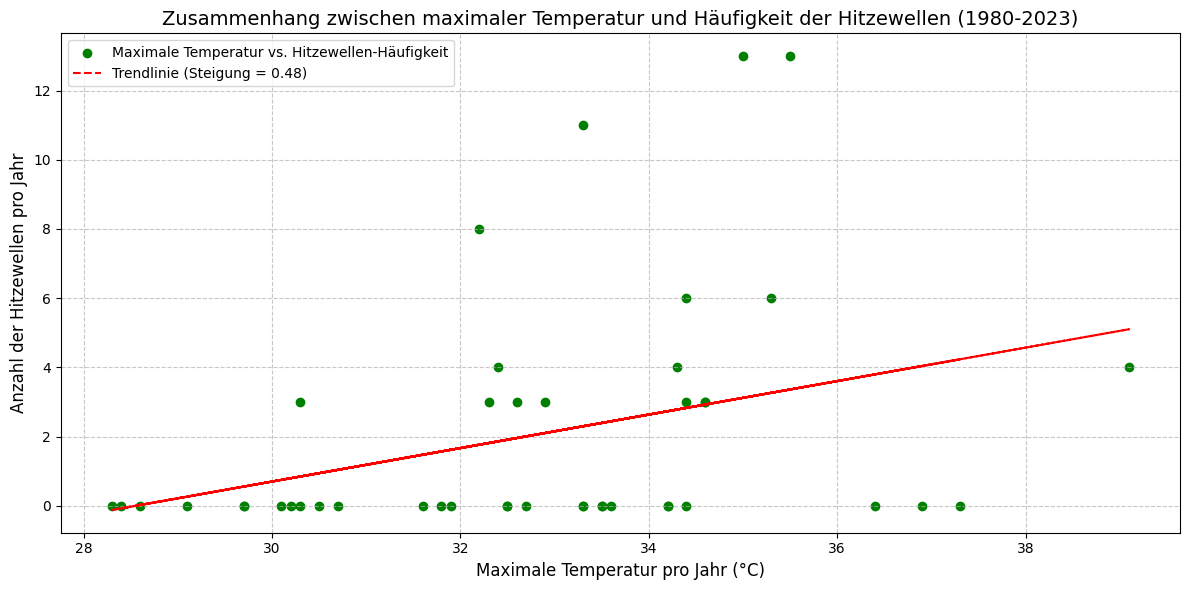

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from meteostat import Point, Daily
from scipy import stats

# Standort Hamburg festlegen
hamburg = Point(53.550341, 10.000654)

# Zeitraum definieren (1980 - 2023)
start = datetime(1980, 1, 1)
end = datetime(2023, 12, 31)

# Wetterdaten für Hamburg abrufen
data = Daily(hamburg, start, end)
data = data.fetch()

# Prüfen, ob Daten verfügbar sind
if not data.empty:
    # Schwellenwert für Hitzewellen definieren (z. B. tmax > 30°C)
    schwellenwert_hitzewelle = 30.0

    # Hitzewellentage identifizieren (tmax > Schwellenwert)
    data['hitzewelle'] = data['tmax'] > schwellenwert_hitzewelle

    # Gruppen für aufeinanderfolgende Hitzewellentage bilden
    data['hitzewellen_gruppe'] = (data['hitzewelle'] != data['hitzewelle'].shift()).cumsum()

    # Aufeinanderfolgende Hitzewellentage zählen
    hitzewellen_zaehler = data.groupby('hitzewellen_gruppe').agg({'hitzewelle': 'sum'})

    # Gruppen mit mindestens 3 aufeinanderfolgenden Tagen filtern (Hitzewellen definieren)
    hitzewellen_perioden = hitzewellen_zaehler[hitzewellen_zaehler['hitzewelle'] >= 3]

    # Jahresinformation hinzufügen
    data['jahr'] = data.index.year

    # Maximale Temperatur jedes Jahres berechnen
    max_temp_pro_jahr = data.groupby('jahr')['tmax'].max()

    # Fehlende Jahre mit NaN auffüllen
    max_temp_pro_jahr = max_temp_pro_jahr.reindex(range(1980, 2024), fill_value=np.nan)

    # Anzahl der Hitzewellen pro Jahr
    hitzewellen_pro_jahr = data.loc[data['hitzewellen_gruppe'].isin(hitzewellen_perioden.index), 'jahr'].value_counts().sort_index()

    # Fehlende Jahre mit 0 auffüllen
    hitzewellen_pro_jahr = hitzewellen_pro_jahr.reindex(range(1980, 2024), fill_value=0)

    # Gemeinsame Indizes für beide Datensätze
    combined_data = pd.DataFrame({
        'max_temp': max_temp_pro_jahr,
        'hitzewellen_pro_jahr': hitzewellen_pro_jahr
    }).dropna()  # NaN-Werte entfernen, um eine vollständige Regression durchzuführen

    # Überprüfen, ob die kombinierten Daten leer sind
    if combined_data.empty:
        print("Fehlende Daten für die lineare Regression. Hier sind die Daten:")
        print(f"Maximale Temperaturen pro Jahr: {max_temp_pro_jahr}")
        print(f"Hitzewellen pro Jahr: {hitzewellen_pro_jahr}")
    else:
        print(f"Verfügbare Daten für die Regression:\n{combined_data.head()}")

        # Lineare Regression zwischen maximaler Temperatur und Hitzewellen-Häufigkeit
        slope, intercept, r_value, p_value, std_err = stats.linregress(combined_data['max_temp'], combined_data['hitzewellen_pro_jahr'])

        # Plot der Daten
        plt.figure(figsize=(12, 6))
        plt.scatter(combined_data['max_temp'], combined_data['hitzewellen_pro_jahr'], color='green', label='Maximale Temperatur vs. Hitzewellen-Häufigkeit')
        plt.plot(combined_data['max_temp'], intercept + slope * combined_data['max_temp'], 'r--', label=f'Trendlinie (Steigung = {slope:.2f})')
        plt.title('Zusammenhang zwischen maximaler Temperatur und Häufigkeit der Hitzewellen (1980-2023)', fontsize=14)
        plt.xlabel('Maximale Temperatur pro Jahr (\u00b0C)', fontsize=12)
        plt.ylabel('Anzahl der Hitzewellen pro Jahr', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend()
        plt.tight_layout()
        plt.show()

else:
    print("Keine Wetterdaten für den angegebenen Zeitraum verfügbar.")

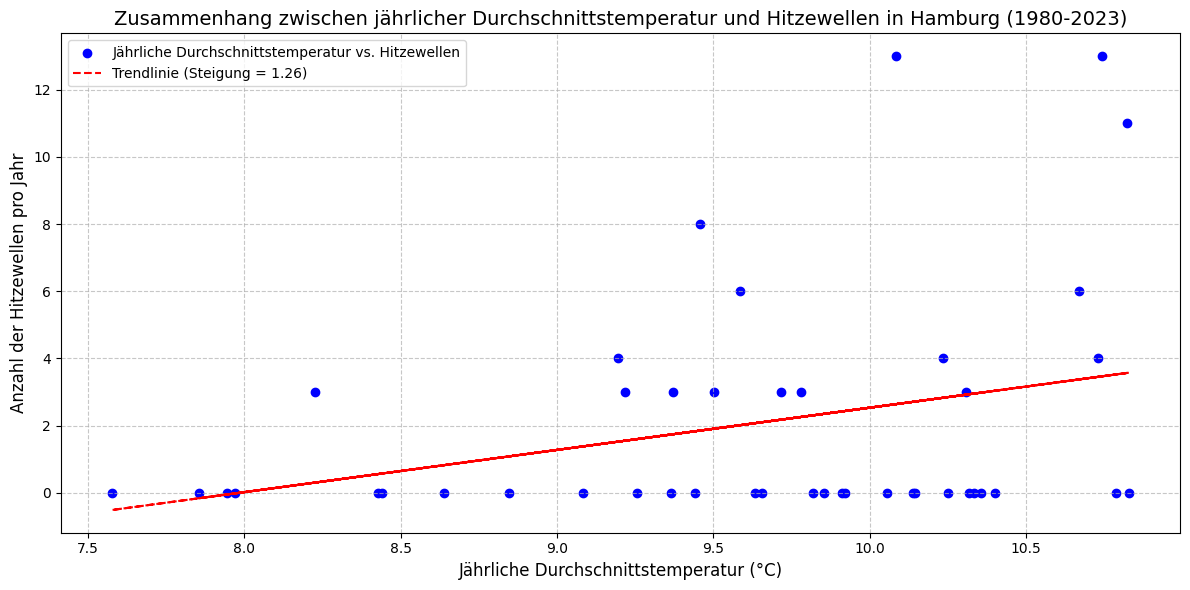

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from meteostat import Point, Daily
from scipy import stats

# Standort Hamburg festlegen
hamburg = Point(53.550341, 10.000654)

# Zeitraum definieren (1980 - 2023)
start = datetime(1980, 1, 1)
end = datetime(2023, 12, 31)

# Wetterdaten für Hamburg abrufen
data = Daily(hamburg, start, end)
data = data.fetch()

# Prüfen, ob Daten verfügbar sind
if not data.empty:
    # Schwellenwert für Hitzewellen definieren (z. B. tmax > 30°C)
    schwellenwert_hitzewelle = 30.0

    # Hitzewellentage identifizieren (tmax > Schwellenwert)
    data['hitzewelle'] = data['tmax'] > schwellenwert_hitzewelle

    # Gruppen für aufeinanderfolgende Hitzewellentage bilden
    data['hitzewellen_gruppe'] = (data['hitzewelle'] != data['hitzewelle'].shift()).cumsum()

    # Aufeinanderfolgende Hitzewellentage zählen
    hitzewellen_zaehler = data.groupby('hitzewellen_gruppe').agg({'hitzewelle': 'sum'})

    # Gruppen mit mindestens 3 aufeinanderfolgenden Tagen filtern (Hitzewellen definieren)
    hitzewellen_perioden = hitzewellen_zaehler[hitzewellen_zaehler['hitzewelle'] >= 3]

    # Jahresinformation hinzufügen
    data['jahr'] = data.index.year

    # Anzahl der Hitzewellen pro Jahr zählen
    hitzewellen_pro_jahr = data.loc[data['hitzewellen_gruppe'].isin(hitzewellen_perioden.index), 'jahr'].value_counts().sort_index()

    # Fehlende Jahre mit 0 auffüllen
    hitzewellen_pro_jahr = hitzewellen_pro_jahr.reindex(range(1980, 2024), fill_value=0)

    # Berechnung der jährlichen Durchschnittstemperatur
    data['year'] = data.index.year
    annual_avg_temp = data.groupby('year')['tavg'].mean()

    # Gemeinsame Indizes für beide Datensätze
    combined_data = pd.DataFrame({
        'hitzewellen_pro_jahr': hitzewellen_pro_jahr,
        'annual_avg_temp': annual_avg_temp
    }).dropna()  # NaN-Werte entfernen, um eine vollständige Regression durchzuführen

    # Lineare Regression zwischen Hitzewellen und Durchschnittstemperatur
    slope, intercept, r_value, p_value, std_err = stats.linregress(combined_data['annual_avg_temp'], combined_data['hitzewellen_pro_jahr'])

    # Plot der Daten
    plt.figure(figsize=(12, 6))
    plt.scatter(combined_data['annual_avg_temp'], combined_data['hitzewellen_pro_jahr'], color='blue', label='Jährliche Durchschnittstemperatur vs. Hitzewellen')
    plt.plot(combined_data['annual_avg_temp'], intercept + slope * combined_data['annual_avg_temp'], 'r--', label=f'Trendlinie (Steigung = {slope:.2f})')
    plt.title('Zusammenhang zwischen jährlicher Durchschnittstemperatur und Hitzewellen in Hamburg (1980-2023)', fontsize=14)
    plt.xlabel('Jährliche Durchschnittstemperatur (°C)', fontsize=12)
    plt.ylabel('Anzahl der Hitzewellen pro Jahr', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

else:
    print("Keine Wetterdaten für den angegebenen Zeitraum verfügbar.")